# Model Building for the BioInformatics Molecular Solubility Regression Task 

In [1]:
import pandas as pd

In [2]:
dataset_url = 'https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv'
dataset = pd.read_csv(dataset_url)
dataset

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


In [5]:
x = dataset.drop(['logS'],axis = 1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [8]:
y = dataset['logS']
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

## Linear Regression Model

In [9]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
model = linear_model.LinearRegression()
model.fit(x,y)

LinearRegression()

## Model Prediction

In [13]:
y_pred = model.predict(x)
y_pred

array([-2.77628837, -2.38661054, -2.77190108, ..., -4.73721496,
       -4.19663007, -2.61784284])

## Model Performance 

In [14]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y, y_pred))

Coefficients: [-0.74173609 -0.00659927  0.00320051 -0.42316387]
Intercept: 0.2565006830997185
Mean squared error (MSE): 1.01
Coefficient of determination (R^2): 0.77


## Model Equation

In [15]:
print('LogS = %.2f %.2f LogP %.4f MW + %.4f RB %.2f AP' % (model.intercept_, model.coef_[0], model.coef_[1], model.coef_[2], model.coef_[3] ) )

LogS = 0.26 -0.74 LogP -0.0066 MW + 0.0032 RB -0.42 AP


## Data Visualization (Experimental vs Predicted LogS for Training Data)


In [16]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental LogS')

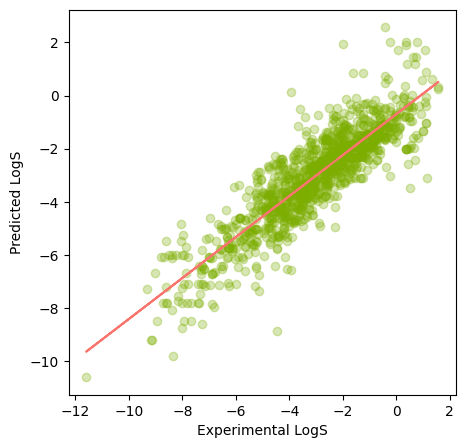

In [17]:

plt.figure(figsize=(5,5))
plt.scatter(x=y, y=y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(y, y_pred, 1)
p = np.poly1d(z)

plt.plot(y,p(y),"#F8766D")
plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')

## Save Model as Pickle Object


In [18]:
import pickle

In [19]:
pickle.dump(model, open('BioInformatics_Soluabiliy_model.pkl','wb'))